In [1]:
import os
import re
import sys
import warnings
import numpy as np
import pandas as pd

sys.path.append('../modules')
import estimate_theil_index as estimate_theil
import estimate_temporal_theil_scaling as estimate_tts

warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

In [2]:
input_path_raw = "../input_files/raw_data"
input_path_processed = "../input_files/processed_data"
input_path_data_dictionary = "../input_files/data_dictionary"
log_path = "../logs"
output_path = "../output_files"
input_generation_date = "2023-06-08"

## Load time series

In [3]:
df_stock_indexes = pd.read_csv("{}/df_stock_index_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)
df_currencies = pd.read_csv("{}/df_currency_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)), low_memory = False)

## Theil index estimation

In [4]:
df_currencies["symbol"].value_counts()

JPY=X       6856
SEK=X       5518
IDR=X       5396
HKD=X       5266
CAD=X       5115
CHFUSD=X    5106
ZAR=X       5072
MXN=X       5067
GBPUSD=X    5053
HUF=X       5050
SGD=X       5044
EURUSD=X    5040
NZD=X       5037
THB=X       4967
INR=X       4965
MYR=X       4938
COP=X       4865
CNY=X       4839
RUB=X       4786
EURCOP=X    4662
PHP=X       4621
BRL=X       4578
AUD=X       4415
BHDUSD=X    4404
KWDUSD=X    4151
OMRUSD=X    3914
KYDUSD=X    3508
JODUSD=X    2566
Name: symbol, dtype: int64

In [ ]:
for i in df_currencies["symbol"].unique():
    if i not in ["....."]:
        name_ = re.sub("(\^)|(=X)", "", i)
        print("Ticker: {} - Name: {}".format(i, name_))

        df_dtts_currencies = pd.read_csv(
            "{}/df_dtts_currency_{}_{}.csv".format(
                input_path_processed,
                name_,
                re.sub("-", "", input_generation_date)
            ),
            low_memory = False
        )

        df_theil_currencies = estimate_theil.estimate_shannon_index_global(
            df_dtts_data = df_dtts_currencies,
            minimal_steps = 0,
            log_path = log_path,
            log_filename = "log_theil_currency_{}".format(name_),
            verbose = 1,
            tqdm_bar = True
        )

        df_theil_currencies.to_csv(
            "{}/df_theil_currency_{}_{}.csv".format(input_path_processed, name_, re.sub("-", "", input_generation_date)),
            index = False
        )

Ticker: KWDUSD=X - Name: KWDUSD


100%|███████████████████| 4151/4151 [54:19<00:00,  1.27it/s]


Ticker: BHDUSD=X - Name: BHDUSD


100%|█████████████████| 4404/4404 [1:07:40<00:00,  1.08it/s]


Ticker: OMRUSD=X - Name: OMRUSD


 70%|█████████████▏     | 2727/3914 [32:36<14:14,  1.39it/s]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

100%|███████████████████| 3914/3914 [46:44<00:00,  1.40it/s]


Ticker: JODUSD=X - Name: JODUSD


100%|███████████████████| 2566/2566 [13:45<00:00,  3.11it/s]


Ticker: KYDUSD=X - Name: KYDUSD


100%|███████████████████| 3508/3508 [41:54<00:00,  1.39it/s]


Ticker: GBPUSD=X - Name: GBPUSD


 34%|█████▊           | 1737/5053 [34:02<1:08:17,  1.24s/it]

In [4]:
df_stock_indexes["symbol"].value_counts()

^GSPC       23659
^N225       14170
^IXIC       13160
^GSPTSE     11016
^FTSE        9938
^GDAXI       8956
^STI         8830
^W5000       8667
^FCHI        8428
^DJI         7906
^IBEX        7556
^BVSP        7433
^MERV        6506
PSI20.LS     2573
IMOEX.ME     2520
Name: symbol, dtype: int64

In [9]:
for i in df_stock_indexes["symbol"].unique():
    if i not in ["^GSPC", "PSI20.LS", "IMOEX.ME", "^BVSP"]:
        name_ = re.sub("(\^)|(=X)", "", i)
        print("Ticker: {} - Name: {}".format(i, name_))

        df_dtts_stock_indexes = pd.read_csv(
                "{}/df_dtts_stock_index_{}_{}.csv".format(
                input_path_processed,
                name_,
                re.sub("-", "", input_generation_date)
            ),
            low_memory = False
        )

        df_theil_stock_indexes = estimate_theil.estimate_shannon_index_global(
            df_dtts_data = df_dtts_stock_indexes[((df_dtts_stock_indexes["time"] >= 4096) & (df_dtts_stock_indexes["time"] <= 5098))],
            minimal_steps = 0,
            log_path = log_path,
            log_filename = "log_theil_stock_index_{}".format(name_),
            verbose = 1,
            tqdm_bar = True
        )

        df_theil_stock_indexes.to_csv(
            "{}/df_theil_stock_index_{}_{}.csv".format(input_path_processed, name_, re.sub("-", "", input_generation_date)),
            index = False
        )

Ticker: ^N225 - Name: N225


100%|███████████████████| 1001/1001 [09:49<00:00,  1.70it/s]


Ticker: ^STI - Name: STI


100%|███████████████████| 1000/1000 [10:42<00:00,  1.56it/s]


Ticker: ^BVSP - Name: BVSP


100%|███████████████████| 1002/1002 [09:29<00:00,  1.76it/s]


Ticker: ^MERV - Name: MERV


100%|███████████████████| 1002/1002 [08:29<00:00,  1.97it/s]


In [4]:
i = "^GSPC"
name_ = re.sub("(\^)|(=X)", "", i)
df_dtts_stock_indexes = pd.read_csv(
        "{}/df_dtts_stock_index_{}_{}.csv".format(
        input_path_processed,
        name_,
        re.sub("-", "", input_generation_date)
    ),
    low_memory = False
)

df_dtts_stock_indexes = df_dtts_stock_indexes[df_dtts_stock_indexes["time"] <= 6500]

df_theil_stock_indexes = estimate_theil.estimate_shannon_index_global(
    df_dtts_data = df_dtts_stock_indexes,
    minimal_steps = 0,
    log_path = log_path,
    log_filename = "log_theil_stock_index_{}".format(name_),
    verbose = 1,
    tqdm_bar = True
)

df_theil_stock_indexes.to_csv(
    "{}/df_theil_stock_index_{}_{}.csv".format(input_path_processed, name_, re.sub("-", "", input_generation_date)),
    index = False
)

100%|█████████████████| 6283/6283 [5:15:37<00:00,  3.01s/it]


# Merge all dataframe with Temporal Theil Scaling (TTS) data

In [12]:
df_theil_currencies = pd.DataFrame()
for i in df_currencies["symbol"].unique():
    if i not in ["KYDUSD=X"]:
        name_ = re.sub("(\^)|(=X)", "", i)
        print("Ticker: {} - Name: {}".format(i, name_))

        df_theil_currencies = df_theil_currencies.append(
            pd.read_csv(
                "{}/df_theil_currency_{}_{}.csv".format(
                    input_path_processed,
                    name_,
                    re.sub("-", "", input_generation_date)
                ),
                low_memory = False
            )
        )
        
df_theil_currencies.to_csv(
    "{}/df_theil_currency_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)),
    index = False
)

Ticker: KWDUSD=X - Name: KWDUSD
Ticker: BHDUSD=X - Name: BHDUSD
Ticker: OMRUSD=X - Name: OMRUSD
Ticker: JODUSD=X - Name: JODUSD
Ticker: GBPUSD=X - Name: GBPUSD
Ticker: CHFUSD=X - Name: CHFUSD
Ticker: EURUSD=X - Name: EURUSD
Ticker: SGD=X - Name: SGD
Ticker: CAD=X - Name: CAD
Ticker: AUD=X - Name: AUD
Ticker: NZD=X - Name: NZD
Ticker: MYR=X - Name: MYR
Ticker: BRL=X - Name: BRL
Ticker: CNY=X - Name: CNY
Ticker: HKD=X - Name: HKD
Ticker: SEK=X - Name: SEK
Ticker: ZAR=X - Name: ZAR
Ticker: MXN=X - Name: MXN
Ticker: THB=X - Name: THB
Ticker: PHP=X - Name: PHP
Ticker: RUB=X - Name: RUB
Ticker: INR=X - Name: INR
Ticker: JPY=X - Name: JPY
Ticker: HUF=X - Name: HUF
Ticker: COP=X - Name: COP
Ticker: IDR=X - Name: IDR
Ticker: EURCOP=X - Name: EURCOP


In [5]:
df_theil_stock_indexes = pd.DataFrame()
for i in df_stock_indexes["symbol"].unique():
    if i not in ["PSI20.LS", "IMOEX.ME"]:
        name_ = re.sub("(\^)|(=X)", "", i)
        print("Ticker: {} - Name: {}".format(i, name_))

        df_theil_stock_indexes = df_theil_stock_indexes.append(
            pd.read_csv(
                "{}/df_theil_stock_index_{}_{}.csv".format(
                    input_path_processed,
                    name_,
                    re.sub("-", "", input_generation_date)
                ),
                low_memory = False
            )
        )

df_theil_stock_indexes.to_csv(
    "{}/df_theil_stock_index_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)),
    index = False
)

Ticker: ^GSPC - Name: GSPC
Ticker: ^DJI - Name: DJI
Ticker: ^W5000 - Name: W5000
Ticker: ^GSPTSE - Name: GSPTSE
Ticker: ^GDAXI - Name: GDAXI
Ticker: ^FTSE - Name: FTSE
Ticker: ^IBEX - Name: IBEX
Ticker: ^FCHI - Name: FCHI
Ticker: ^IXIC - Name: IXIC
Ticker: ^N225 - Name: N225
Ticker: ^STI - Name: STI
Ticker: ^BVSP - Name: BVSP
Ticker: ^MERV - Name: MERV


## Estimate Temporal Theil Scaling exponent

In [13]:
df_theil_currencies = pd.read_csv(
    "{}/df_theil_currency_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)),
    low_memory = False
)
df_theil_stock_indexes = pd.read_csv(
    "{}/df_theil_stock_index_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)),
    low_memory = False
)

In [ ]:
df_currency_tts = estimate_tts.estimate_tts_parameters(
    df_fts = df_theil_currencies,
    minimal_steps = 60,
    p_norm = 2,
    log_path = log_path,
    log_filename = "tts_evolution_currency",
    verbose = 1,
    tqdm_bar = True
)

 83%|██████████▊  | 108424/129926 [1:36:00<21:04, 17.01it/s]

In [8]:
df_stock_tts = estimate_tts.estimate_tts_parameters(
    df_fts = df_theil_stock_indexes,
    minimal_steps = 60,
    p_norm = 2,
    log_path = log_path,
    log_filename = "tts_evolution_stock",
    verbose = 1,
    tqdm_bar = True
)

100%|█████████████████| 28628/28628 [18:25<00:00, 25.91it/s]


## Save TTS data

In [9]:
df_currency_tts.to_csv("{}/df_tts_currency_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)) , index = False)

In [10]:
df_stock_tts.to_csv("{}/df_tts_stock_index_{}.csv".format(input_path_processed, re.sub("-", "", input_generation_date)) , index = False)

## Temporal proofs

<AxesSubplot:xlabel='mean_value', ylabel='shannon_index'>

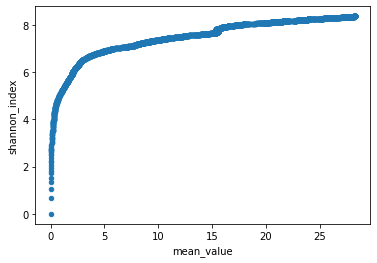

In [11]:
A = df_theil_stock_indexes[((df_theil_stock_indexes["symbol"] == "^IBEX") & (df_theil_stock_indexes["time_series"] == "absolute log-return"))]
A.plot(kind = "scatter", x = "mean_value", y = "shannon_index", legend = True)

In [7]:
from scipy.optimize import curve_fit

curve_fit(estimate_tts.temporal_theil_scaling, 1 - A["mean_value"]/A["mean_value"].max(), A["shannon_index"] / A["shannon_index"].max())

(array([1.01213538, 0.13621304]),
 array([[1.66588499e-07, 9.73035138e-08],
        [9.73035138e-08, 1.12489091e-07]]))

In [8]:
estimate_tts.estimate_tts_parameters_local(
    df_fts = A,
    p_norm = 2,
    log_path = log_path,
    log_filename = "log_temp",
    verbose = 0,
    arg_list = ["^IBEX", 5098]
)

,symbol,max_step,time_series,p_norm,coefficient_tts,error_coefficient_tts,exponent_tts,error_exponent_tts,average_error_tts,rsquared_tts
0,^IBEX,5098,absolute log-return,2,1.012135,0.000408,0.136213,0.000335,0.09459,0.97719
